In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    roc_curve, 
    auc, 
    precision_score, 
    recall_score
)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("NBA Training Data.csv")
train_df = pd.read_csv("NBA Training Data.csv")

In [ ]:
train.head() 

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,STL,BLK,BLKA,PF,PFD,+/-,SEASON,CONFERENCE,TOP 4,TOP 8
0,Phoenix Suns,82,64,18,0.780,48.1,114.8,43.7,90.1,48.5,...,8.6,4.4,4.0,19.9,18.9,7.5,2021-22,Western,No,Yes
1,Memphis Grizzlies,82,56,26,0.683,48.2,115.6,43.5,94.4,46.1,...,9.8,6.5,6.0,19.8,19.8,5.7,2021-22,Western,No,Yes
2,Golden State Warriors,82,53,29,0.646,48.1,111.0,40.5,86.4,46.9,...,8.8,4.5,3.9,21.0,18.0,5.5,2021-22,Western,Yes,Yes
3,Miami Heat,82,53,29,0.646,48.4,110.0,39.6,84.8,46.7,...,7.4,3.2,4.0,20.5,20.6,4.5,2021-22,Eastern,Yes,Yes
4,Dallas Mavericks,82,52,30,0.634,48.2,108.0,39.3,85.1,46.1,...,6.7,4.0,3.7,19.7,20.1,3.3,2021-22,Western,Yes,Yes


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        300 non-null    object 
 1   GP          300 non-null    int64  
 2   W           300 non-null    int64  
 3   L           300 non-null    int64  
 4   WIN%        300 non-null    float64
 5   MIN         300 non-null    float64
 6   PTS         300 non-null    float64
 7   FGM         300 non-null    float64
 8   FGA         300 non-null    float64
 9   FG%         300 non-null    float64
 10  3PM         300 non-null    float64
 11  3PA         300 non-null    float64
 12  3P%         300 non-null    float64
 13  FTM         300 non-null    float64
 14  FTA         300 non-null    float64
 15  FT%         300 non-null    float64
 16  OREB        300 non-null    float64
 17  DREB        300 non-null    float64
 18  REB         300 non-null    float64
 19  AST         300 non-null    f

In [ ]:
test = pd.read_csv("NBA Testing Data.csv")
test_df = pd.read_csv("NBA Testing Data.csv")

In [ ]:
test.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,STL,BLK,BLKA,PF,PFD,+/-,SEASON,CONFERENCE,TOP 4,TOP 8
0,Milwaukee Bucks,82,58,24,0.707,48.4,116.9,42.7,90.4,47.3,...,6.4,4.9,3.9,18.0,19.0,3.6,2022-23,Eastern,No,No
1,Boston Celtics,82,57,25,0.695,48.7,117.9,42.2,88.8,47.5,...,6.4,5.2,3.9,18.8,19.1,6.5,2022-23,Eastern,Yes,Yes
2,Philadelphia 76ers,82,54,28,0.659,48.5,115.2,40.8,83.8,48.7,...,7.7,4.7,4.6,20.4,19.6,4.3,2022-23,Eastern,No,Yes
3,Denver Nuggets,82,53,29,0.646,48.2,115.8,43.6,86.4,50.4,...,7.5,4.5,4.2,18.6,19.5,3.3,2022-23,Western,Yes,Yes
4,Cleveland Cavaliers,82,51,31,0.622,48.5,112.3,41.6,85.2,48.8,...,7.1,4.7,4.4,19.0,20.4,5.4,2022-23,Eastern,No,No


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        30 non-null     object 
 1   GP          30 non-null     int64  
 2   W           30 non-null     int64  
 3   L           30 non-null     int64  
 4   WIN%        30 non-null     float64
 5   MIN         30 non-null     float64
 6   PTS         30 non-null     float64
 7   FGM         30 non-null     float64
 8   FGA         30 non-null     float64
 9   FG%         30 non-null     float64
 10  3PM         30 non-null     float64
 11  3PA         30 non-null     float64
 12  3P%         30 non-null     float64
 13  FTM         30 non-null     float64
 14  FTA         30 non-null     float64
 15  FT%         30 non-null     float64
 16  OREB        30 non-null     float64
 17  DREB        30 non-null     float64
 18  REB         30 non-null     float64
 19  AST         30 non-null     flo

### 
Preprocessing

In [ ]:
train['TOP 4'] = [1 if i == 'Yes' else 0 for i in train['TOP 4']]
train_df['TOP 4'] = [1 if i == 'Yes' else 0 for i in train_df['TOP 4']]
train.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,STL,BLK,BLKA,PF,PFD,+/-,SEASON,CONFERENCE,TOP 4,TOP 8
0,Phoenix Suns,82,64,18,0.780,48.1,114.8,43.7,90.1,48.5,...,8.6,4.4,4.0,19.9,18.9,7.5,2021-22,Western,0,Yes
1,Memphis Grizzlies,82,56,26,0.683,48.2,115.6,43.5,94.4,46.1,...,9.8,6.5,6.0,19.8,19.8,5.7,2021-22,Western,0,Yes
2,Golden State Warriors,82,53,29,0.646,48.1,111.0,40.5,86.4,46.9,...,8.8,4.5,3.9,21.0,18.0,5.5,2021-22,Western,1,Yes
3,Miami Heat,82,53,29,0.646,48.4,110.0,39.6,84.8,46.7,...,7.4,3.2,4.0,20.5,20.6,4.5,2021-22,Eastern,1,Yes
4,Dallas Mavericks,82,52,30,0.634,48.2,108.0,39.3,85.1,46.1,...,6.7,4.0,3.7,19.7,20.1,3.3,2021-22,Western,1,Yes


In [ ]:
train['CONFERENCE'] = [1 if i == 'Eastern' else 0 for i in train['CONFERENCE']]
train_df['CONFERENCE'] = [1 if i == 'Eastern' else 0 for i in train_df['CONFERENCE']]
train.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,STL,BLK,BLKA,PF,PFD,+/-,SEASON,CONFERENCE,TOP 4,TOP 8
0,Phoenix Suns,82,64,18,0.780,48.1,114.8,43.7,90.1,48.5,...,8.6,4.4,4.0,19.9,18.9,7.5,2021-22,0,0,Yes
1,Memphis Grizzlies,82,56,26,0.683,48.2,115.6,43.5,94.4,46.1,...,9.8,6.5,6.0,19.8,19.8,5.7,2021-22,0,0,Yes
2,Golden State Warriors,82,53,29,0.646,48.1,111.0,40.5,86.4,46.9,...,8.8,4.5,3.9,21.0,18.0,5.5,2021-22,0,1,Yes
3,Miami Heat,82,53,29,0.646,48.4,110.0,39.6,84.8,46.7,...,7.4,3.2,4.0,20.5,20.6,4.5,2021-22,1,1,Yes
4,Dallas Mavericks,82,52,30,0.634,48.2,108.0,39.3,85.1,46.1,...,6.7,4.0,3.7,19.7,20.1,3.3,2021-22,0,1,Yes


In [ ]:
test['TOP 4'] = [1 if i == 'Yes' else 0 for i in test['TOP 4']]
test_df['TOP 4'] = [1 if i == 'Yes' else 0 for i in test_df['TOP 4']]

In [ ]:
test['CONFERENCE'] = [1 if i == 'Eastern' else 0 for i in test['CONFERENCE']]
test_df['CONFERENCE'] = [1 if i == 'Eastern' else 0 for i in test_df['CONFERENCE']]
test.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,STL,BLK,BLKA,PF,PFD,+/-,SEASON,CONFERENCE,TOP 4,TOP 8
0,Milwaukee Bucks,82,58,24,0.707,48.4,116.9,42.7,90.4,47.3,...,6.4,4.9,3.9,18.0,19.0,3.6,2022-23,1,0,No
1,Boston Celtics,82,57,25,0.695,48.7,117.9,42.2,88.8,47.5,...,6.4,5.2,3.9,18.8,19.1,6.5,2022-23,1,1,Yes
2,Philadelphia 76ers,82,54,28,0.659,48.5,115.2,40.8,83.8,48.7,...,7.7,4.7,4.6,20.4,19.6,4.3,2022-23,1,0,Yes
3,Denver Nuggets,82,53,29,0.646,48.2,115.8,43.6,86.4,50.4,...,7.5,4.5,4.2,18.6,19.5,3.3,2022-23,0,1,Yes
4,Cleveland Cavaliers,82,51,31,0.622,48.5,112.3,41.6,85.2,48.8,...,7.1,4.7,4.4,19.0,20.4,5.4,2022-23,1,0,No


In [ ]:
test_df = test_df.drop(["GP", "TEAM", "SEASON", "TOP 8"], axis=1)
train_df = train_df.drop(["GP", "TEAM", "SEASON", "TOP 8"], axis=1)

Normalization

In [ ]:
def norm(x_train, x_test):
    n_train_x =(x_train-x_train.min())/(x_train.max()-x_train.min())
    n_test_x = (x_test-x_test.min())/(x_test.max()-x_test.min())
    return n_train_x, n_test_x

model and accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB
def naivebase(trainX, trainY, testX):
    # Build a Gaussian Classifier
    model = GaussianNB()
    model.fit(trainX, trainY)

    pred_y = model.predict(testX)
    return pred_y, model

def Acc(testY, pred_y):
    accuray = accuracy_score(testY, pred_y)
    f1 = f1_score(testY, pred_y, average="weighted")
    precision = precision_score(testY, pred_y, average='weighted')  # Adjust 'average' as needed
    recall = recall_score(testY, pred_y, average='weighted')  # Adjust 'average' as needed
    print("Accuracy:", accuray)
    print("F1 Score:", f1)
    print("precision:", precision)
    print("recall:", recall)

    labels = [0,1]
    cm = confusion_matrix(testY, pred_y, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()

    false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(testY, pred_y)
    roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

    plt.figure(figsize=(7,7))
    plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label="Decision tree, AUC="+str(roc_auc_1))
    # plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

## Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("NBA Dataset.csv")


In [ ]:
df['TOP 4'] = [1 if i == 'Yes' else 0 for i in df['TOP 4']]
df = df.drop(["GP"], axis=1)

In [ ]:
test_df = test_df.drop(["GP", "TEAM", "SEASON", "TOP 8"], axis=1)

In [ ]:
test_df['TOP 4'] = [1 if i == 'Yes' else 0 for i in test_df['TOP 4']]

test_x = test_df.drop(['CONFERENCE', 'TOP 4'], axis = 1)
test_y = test_df['TOP 4']

In [ ]:
train_split, test_split = train_test_split(df, test_size = 0.3, random_state= 42)

In [ ]:
x_train_split = train_split.drop(["TOP 4"], axis=1)
y_train_split = train_split["TOP 4"].values

# Separate features and target variable for testing data
x_test_split = test_split.drop(["TOP 4"], axis=1)
y_test_split = test_split["TOP 4"].values

In [ ]:
n_train_split_x, n_test_split_x = norm(x_train_split, x_test_split)
test_x, test_y = norm(test_x, test_y)

In [ ]:
n_train_split_x.shape

(210, 26)

### benchmark

Accuracy: 0.9111111111111111
F1 Score: 0.9198902606310014
precision: 0.9342283595448153
recall: 0.9111111111111111


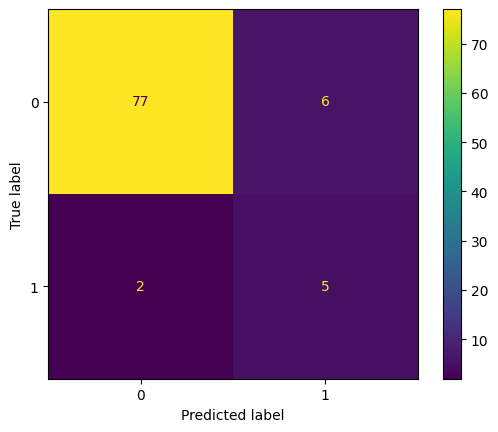

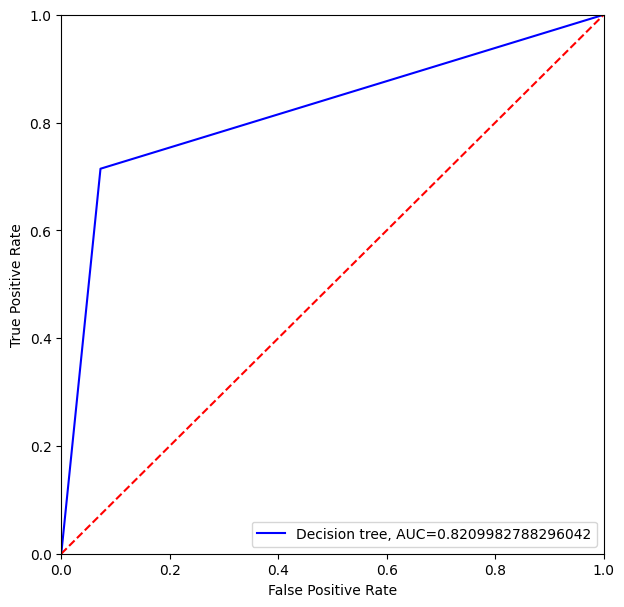

In [ ]:
predY, model = naivebase(n_train_split_x, y_train_split, n_test_split_x)
Acc(y_test_split, predY)

### Final test

In [ ]:
final_pred_y = model.predict(test_x)
print("Training vs Test vs F1 Score")
print("{:.4f}  |  {:.4f}  |  {:.4f}".format(model.score(n_train_split_x, y_train_split), model.score(test_x, test_y), f1_score(test_y, final_pred_y, average="weighted")))

Training vs Test vs F1 Score
0.8429  |  0.8667  |  0.8048


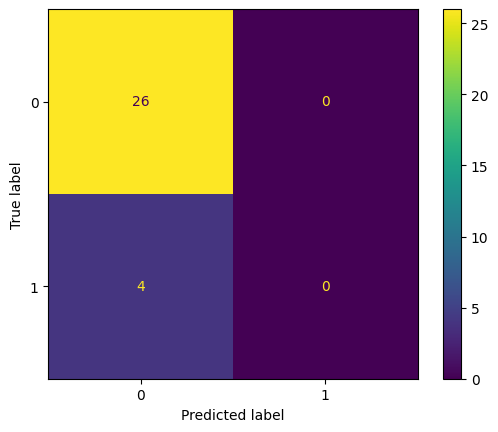

In [ ]:
labels = [0,1]
cm = confusion_matrix(test_y, final_pred_y, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42, k_neighbors = 3)
x_train_smote, y_train_smote = smote.fit_resample(n_train_split_x, y_train_split)

In [ ]:
model = GaussianNB()
model.fit(x_train_smote, y_train_smote)
y_pred = model.predict(n_test_split_x)

Accuracy: 0.9
F1 Score: 0.9144654088050315
precision: 0.9434210526315788
recall: 0.9


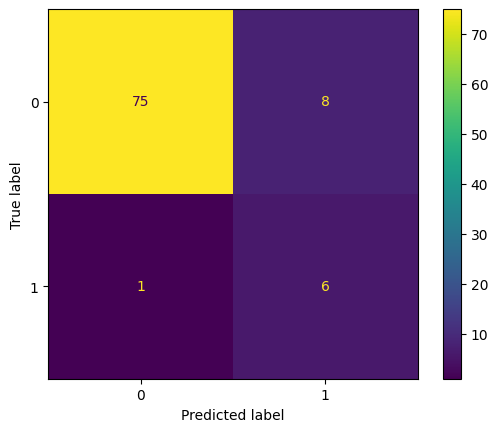

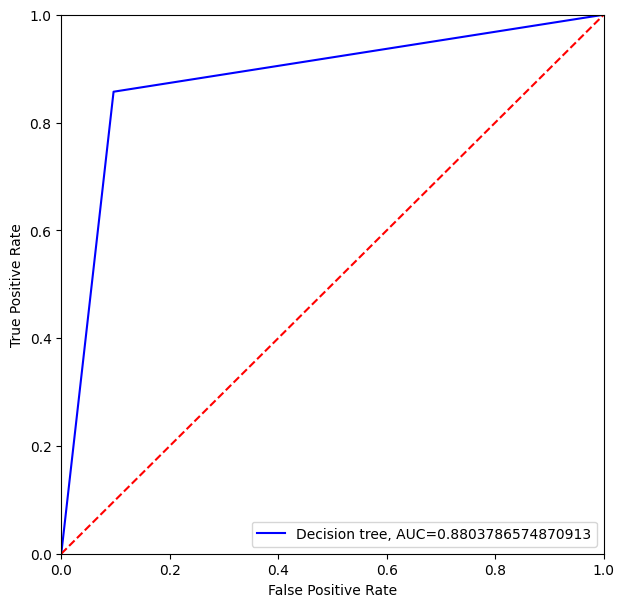

In [ ]:
Acc(y_test_split, y_pred)

In [ ]:
final_pred_y = model.predict(test_x)
print("Training vs Test vs F1 Score")
print("{:.4f}  |  {:.4f}  |  {:.4f}".format(model.score(x_train_smote, y_train_smote), model.score(test_x, test_y), f1_score(test_y, final_pred_y, average="weighted")))

Training vs Test vs F1 Score
0.8757  |  0.8667  |  0.8048


### Feature selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
sfs_model = sfs(GaussianNB(), 
                n_features_to_select="auto", # Selecting a specific number of features
                tol= 0.01,
                direction='backward',
                cv=5, # Reduced number of folds
                n_jobs=10) # Adjust based on your system's capabilities

sfs_model.fit(x_train_smote, y_train_smote)

train_feature = x_train_smote.drop(x_train_smote.columns[sfs_model.get_support() == False], axis=1)
test_feature = n_test_split_x.drop(n_test_split_x.columns[sfs_model.get_support() == False], axis=1)




In [ ]:
x_train_smote.shape

(354, 25)

In [ ]:
# x_train_smote.columns[sfs_model.get_support()]
# sfs_model.get_support()
train_feature.shape

(354, 24)

In [ ]:
len(y_pred)

2

Accuracy: 0.9111111111111111
F1 Score: 0.9227777777777777
precision: 0.9461427461427461
recall: 0.9111111111111111


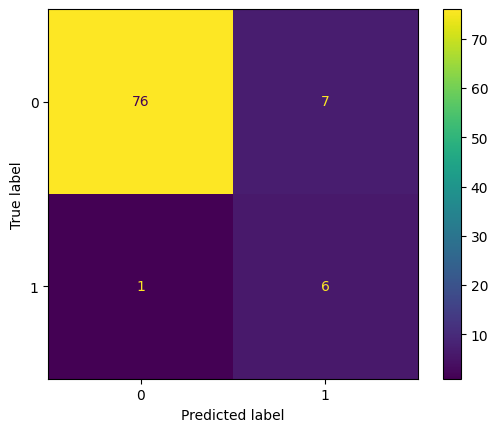

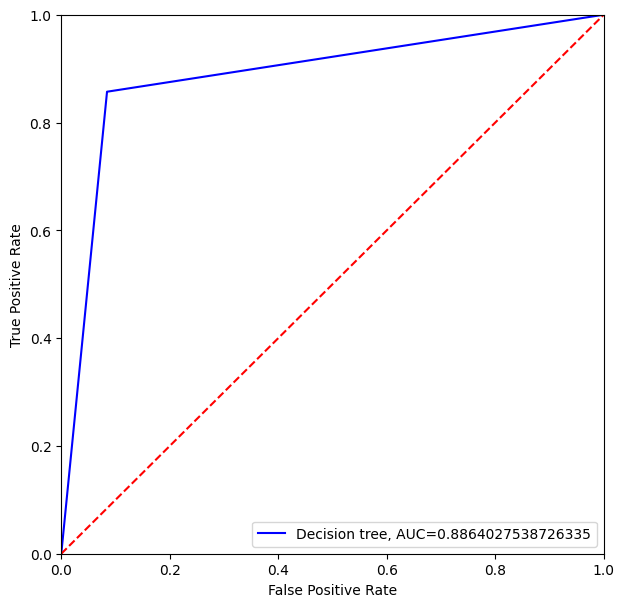

In [ ]:
y_pred, model = naivebase(train_feature, y_train_smote, test_feature)
Acc(y_test_split, y_pred)

In [ ]:
test_x = test_x.drop(test_x.columns[sfs_model.get_support() == False], axis=1)

In [ ]:
final_pred_y = model.predict(test_x)
print("Training vs Test vs F1 Score")
print("{:.4f}  |  {:.4f}  |  {:.4f}".format(model.score(train_feature, y_train_smote), model.score(test_x, test_y), f1_score(test_y, final_pred_y, average="weighted")))

Training vs Test vs F1 Score
0.8785  |  0.8667  |  0.8048


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = GaussianNB()


parameters = {'var_smoothing': [1e-11, 1e-12, 1e-9, 1e-10]}

clf = GridSearchCV(model, parameters, cv=5)
clf.fit(train_feature, y_train_smote)

print("Best var_smoothing:", clf.best_params_)

Best var_smoothing: {'var_smoothing': 1e-11}


In [ ]:
model = GaussianNB(var_smoothing=1e-11)
model.fit(train_feature, y_train_smote)
pred_y = model.predict(test_feature)

Accuracy: 0.9111111111111111
F1 Score: 0.9227777777777777
precision: 0.9461427461427461
recall: 0.9111111111111111


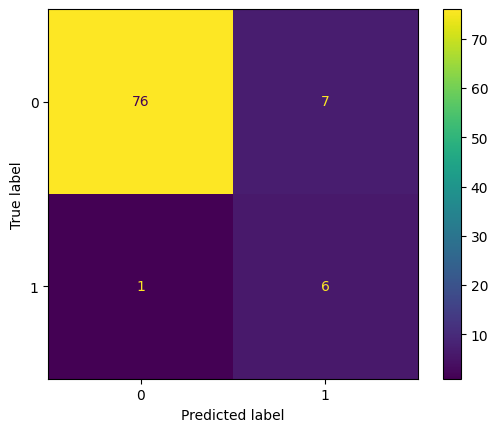

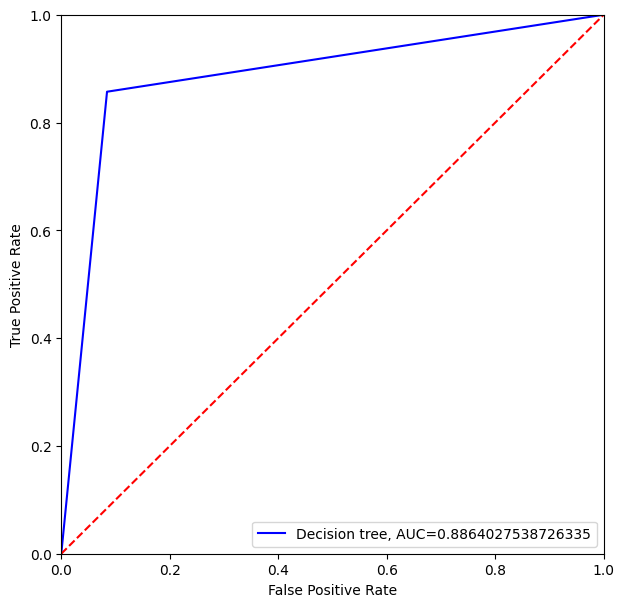

In [ ]:
Acc(y_test_split, y_pred)

In [ ]:
final_pred_y = model.predict(test_x)
print("Training vs Test vs F1 Score")
print("{:.4f}  |  {:.4f}  |  {:.4f}".format(model.score(train_feature, y_train_smote), model.score(test_x, test_y), f1_score(test_y, final_pred_y, average="weighted")))

Training vs Test vs F1 Score
0.8785  |  0.8667  |  0.8048


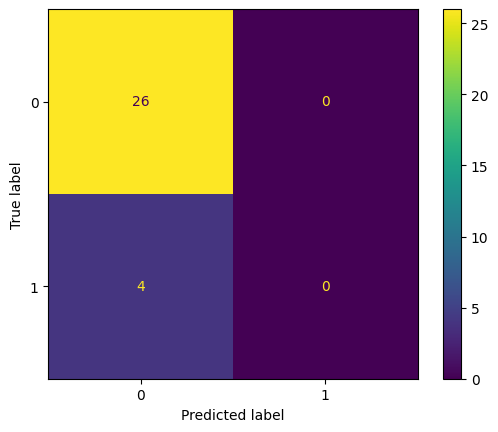

In [ ]:
labels = [0,1]
cm = confusion_matrix(test_y, final_pred_y, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

## Benchmark

In [ ]:
# Separate features and target variable for training data
x_train = train_df.drop(["TOP 4"], axis=1)
y_train = train_df["TOP 4"].values

# Separate features and target variable for testing data
x_test = test_df.drop(["TOP 4"], axis=1)
y_test = test_df["TOP 4"].values

In [ ]:
# x_train

In [ ]:
n_train_x =(x_train-x_train.min())/(x_train.max()-x_train.min())
n_test_x = (x_test-x_test.min())/(x_test.max()-x_test.min())

### Accuracy

In [ ]:
accuray = accuracy_score(y_test, pred_y)
f1 = f1_score(y_test, pred_y, average="weighted")
precision = precision_score(y_test, pred_y, average='weighted')  # Adjust 'average' as needed
recall = recall_score(y_test, pred_y, average='weighted')  # Adjust 'average' as needed
print("Accuracy:", accuray)
print("F1 Score:", f1)
print("precision:", precision)
print("recall:", recall)

ValueError: Found input variables with inconsistent numbers of samples: [30, 99]

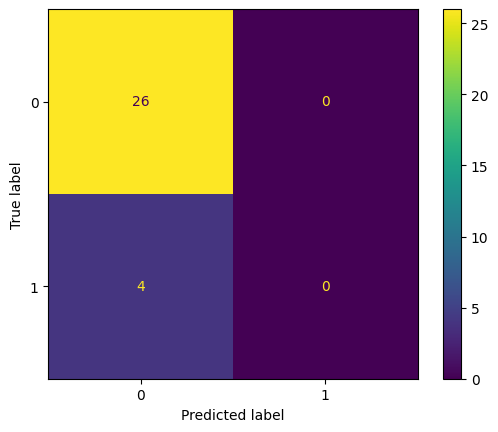

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, pred_y, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### AUC-ROC

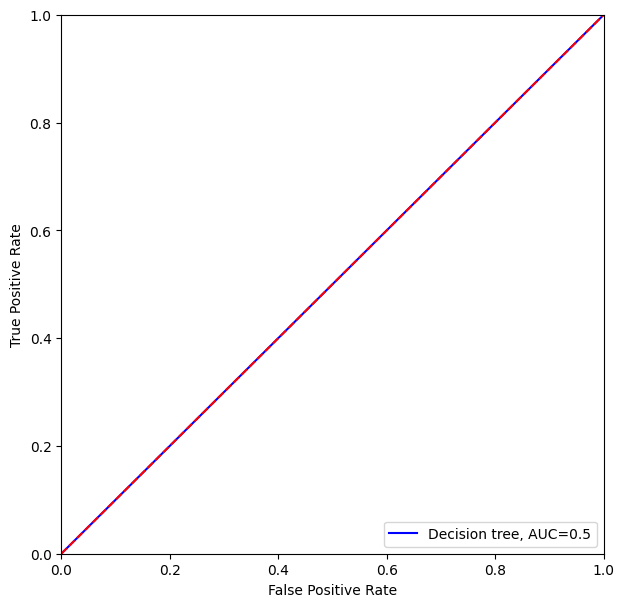

In [ ]:
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, pred_y)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.figure(figsize=(7,7))
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label="Decision tree, AUC="+str(roc_auc_1))
# plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

## ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = MultinomialNB()
ada_model = AdaBoostClassifier(model, n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)

ada_model.fit(n_train_x, y_train)
y_pred = ada_model.predict(n_test_x)

### Accuracy

In [ ]:

accuray = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
recall = recall_score(y_test, y_pred, average='weighted')  # Adjust 'average' as needed
print("Accuracy:", accuray)
print("F1 Score:", f1)
print("precision:", precision)
print("recall:", recall)

Accuracy: 0.8333333333333334
F1 Score: 0.8509585652442797
precision: 0.886128364389234
recall: 0.8333333333333334


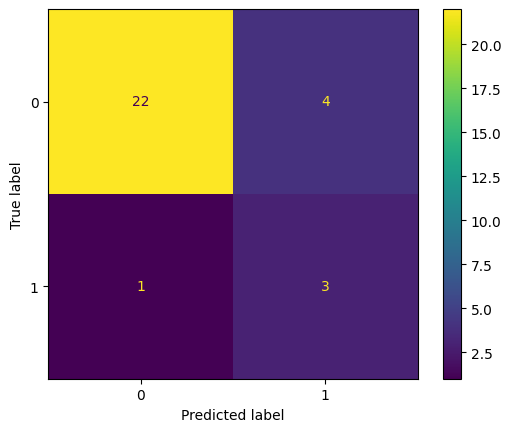

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

### AUC-ROC

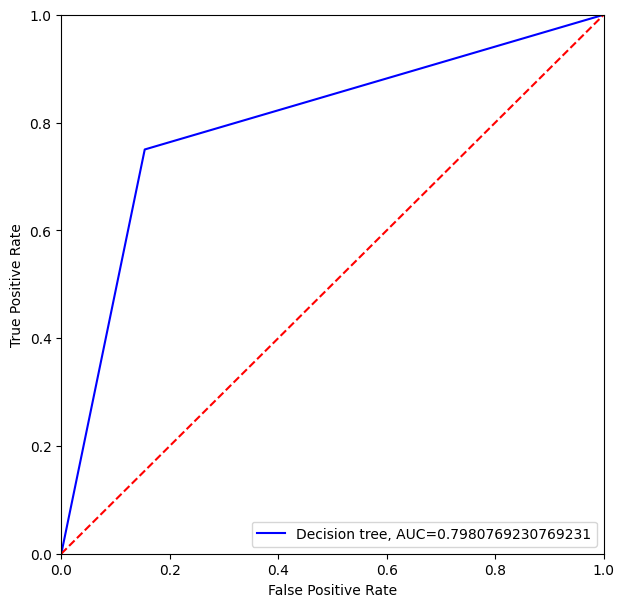

In [ ]:
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)

plt.figure(figsize=(7,7))
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label="Decision tree, AUC="+str(roc_auc_1))
# plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Feature Selections-Wrapper

In [ ]:
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [ ]:
n_train_x.shape

(300, 26)

In [ ]:
sfs_model = sfs(MultinomialNB(), 
                n_features_to_select=20, # Selecting a specific number of features
                direction='forward',
                cv=5, # Reduced number of folds
                n_jobs=4) # Adjust based on your system's capabilities

sfs_model.fit(n_train_x, y_train)

SequentialFeatureSelector(estimator=MultinomialNB(), n_features_to_select=20,
                          n_jobs=4)

In [ ]:
# Print the boolean values of the features selected
n_train_x.columns[sfs_model.get_support()]

Index(['W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL'],
      dtype='object')

In [ ]:
train_feature = n_train_x.drop(n_train_x.columns[sfs_model.get_support() == False], axis=1)
test_feature = n_test_x.drop(n_test_x.columns[sfs_model.get_support() == False], axis=1)

In [ ]:
model = MultinomialNB()
model.fit(train_feature, y_train)

pred_y = model.predict(test_feature)

In [ ]:
accuray = accuracy_score(y_test, pred_y)
f1 = f1_score(y_test, pred_y, average="weighted")
precision = precision_score(y_test, pred_y, average='weighted')  # Adjust 'average' as needed
recall = recall_score(y_test, pred_y, average='weighted')  # Adjust 'average' as needed
print("Accuracy:", accuray)
print("F1 Score:", f1)
print("precision:", precision)
print("recall:", recall)

Accuracy: 0.8666666666666667
F1 Score: 0.8047619047619048
precision: 0.7511111111111112
recall: 0.8666666666666667
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


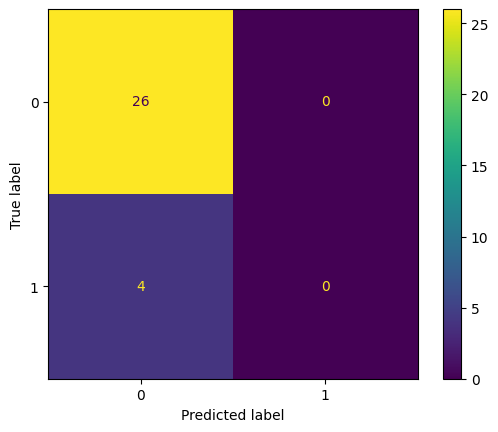

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, pred_y, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70fbdbb3-a702-4c85-bc26-c75e4cfeedbb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>